**Clustering Project 2.0 - B18101071**


Download Dataset from "https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset"

In [46]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import random
from sklearn.cluster import  KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [47]:
#read csv file
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention (2).csv


In [48]:
#Storing in dataset in df variable
df = pd.read_csv("online_shoppers_intention.csv")
#Getting first n rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [49]:
#Priting all information about dataset
df.info()
#Printing shape (dimension) of the dataset
print(f"Shape = {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [50]:
#Used describe function to evaluate outliers
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


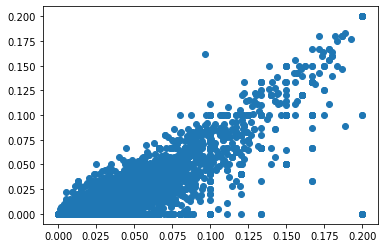

<Figure size 720x504 with 0 Axes>

In [51]:
#Scatter plot of Exit Rates & Bounce Rates
plt.scatter(df["ExitRates"],df["BounceRates"])
fig = plt.figure(figsize =(10, 7))
plt.show() 

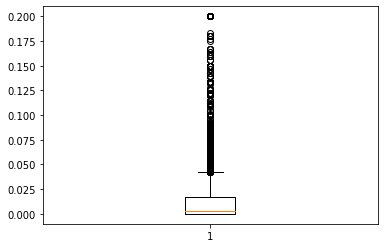

<Figure size 720x504 with 0 Axes>

In [52]:
#Box Plot of Bounce Rates
plt.boxplot(df["BounceRates"])
fig = plt.figure(figsize =(10, 7))
plt.show() 

In [53]:
#Looking for 0's in Bounce Rates
count = (df["BounceRates"] == 0).sum()
print(f"Sum Count of 0's = {count}")

Sum Count of 0's = 5518


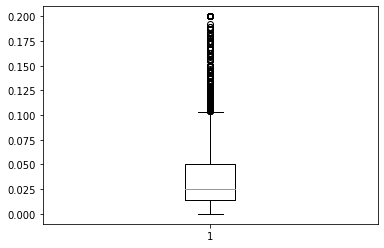

<Figure size 720x504 with 0 Axes>

In [54]:
#Box Plot for Exit Rates
plt.boxplot(df["ExitRates"])
fig = plt.figure(figsize =(10, 7))
plt.show() 

In [55]:
#Looking for 0's in Exit Rates
count = (df["ExitRates"] == 0).sum()
print(f"Sum Count of 0's = {count}")

Sum Count of 0's = 76


In [56]:
#Storing Exit Rates & Bounce Rates as a dataframe
dataset = pd.DataFrame({'x1': df["ExitRates"], 'x2': df["BounceRates"]}, columns=['x1', 'x2'])
dataset

,x1,x2
0,0.200000,0.200000
1,0.100000,0.000000
2,0.200000,0.200000
3,0.140000,0.050000
4,0.050000,0.020000
...,...,...
12325,0.029031,0.007143
12326,0.021333,0.000000
12327,0.086667,0.083333
12328,0.021053,0.000000


**Elbow Plot to determine Best number of Clusters**

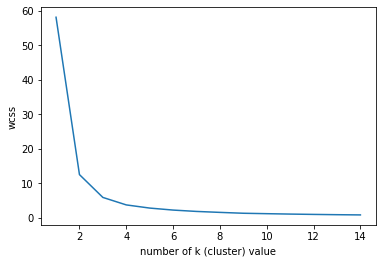

In [57]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_) #Inertia means that find to value of wcss
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

**Applying K-Mean**

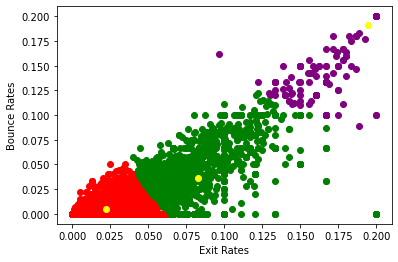

In [58]:
kmean2 = KMeans(n_clusters=3)
clusters = kmean2.fit_predict(dataset)

dataset["label"] = clusters

plt.scatter(dataset.x1[dataset.label == 0], dataset.x2[dataset.label == 0], color="red",)
plt.scatter(dataset.x1[dataset.label == 1], dataset.x2[dataset.label == 1], color="purple")
plt.scatter(dataset.x1[dataset.label == 2], dataset.x2[dataset.label == 2], color="green")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="yellow") # scentroidler

plt.xlabel("Exit Rates")
plt.ylabel("Bounce Rates")

plt.show()

**Applying Hierarchical Clustering**

In [59]:
#Prepare dataset for Hierarchical Clustering 
data3 = dataset.iloc[:,dataset.columns != 'label'].head(50)

Complete Linkage

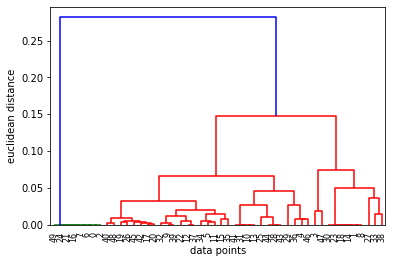

In [60]:
merg = linkage(data3, method="complete")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

Single Linkage

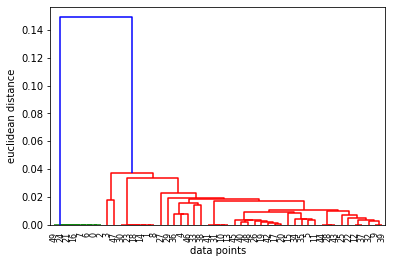

In [61]:
merg = linkage(data3, method="single")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

Centorid

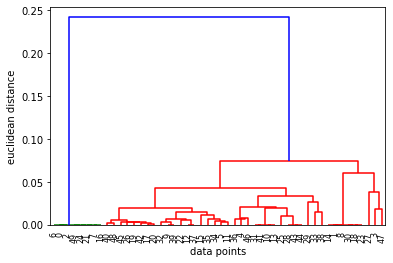

In [62]:
merg = linkage(data3, method="centroid")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

Average Linkage

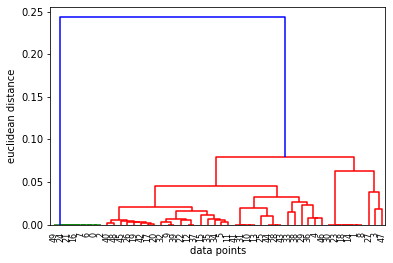

In [63]:
merg = linkage(data3, method="average")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()